In [16]:
import numpy as np     #只需要下载numpy库即可
import GridWorld_v2
# import set

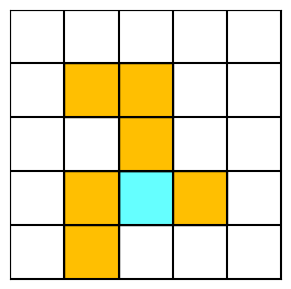

In [17]:
gamma = 0.9   #折扣因子，越接近0越近视

rows = 5      #记得行数和列数这里要同步改
columns = 5

# gridworld = GridWorld_v2.GridWorld_v2(rows=rows, columns=columns, forbiddenAreaNums=8, targetNums=2, seed = 52,forbiddenAreaScore=-10)
# gridworld = GridWorld_v2.GridWorld_v2(desc = [".#",".T"])             #赵老师4-1的例子
# gridworld = GridWorld_v2.GridWorld_v2(desc = ["##.T","...#","...."])  #随便弄的例子
desc = [".....",".##..","..#..",".#T#.",".#..."]
gridworld = GridWorld_v2.GridWorld_v2(forbidden_area_score=-10, score=1,desc=desc) 
#gridworld = GridWorld_v2.GridWorld_v2(forbiddenAreaScore=-10, score=1,desc = ["T."]) 
gridworld.show()

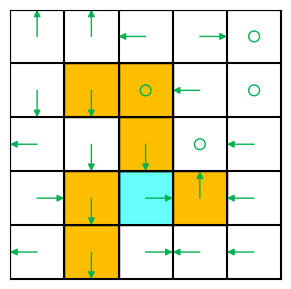

In [18]:
value = np.zeros(rows*columns).reshape(rows,columns)       #初始化可以任意，也可以全0
qtable = np.zeros((rows*columns,5)).reshape(rows,columns,5)  #初始化，这里主要是初始化维数，里面的内容会被覆盖所以无所谓
np.random.seed(50)
policy = np.eye(5)[np.random.randint(0,5,size=(rows*columns))].reshape(rows,columns,5) # TODO policy有一些不同,需要重新考虑绘图方法 
gridworld.show_policy(policy.argmax(axis=2))

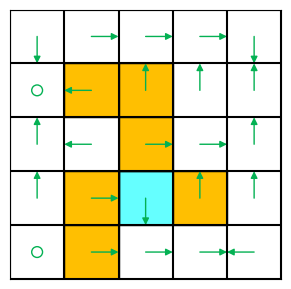

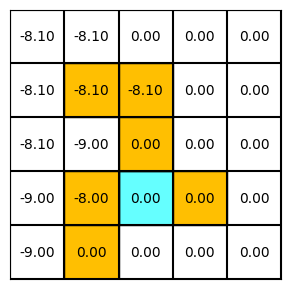

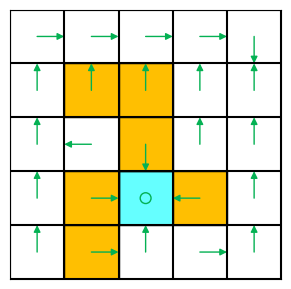

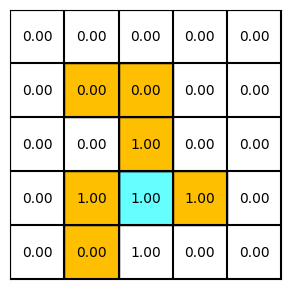

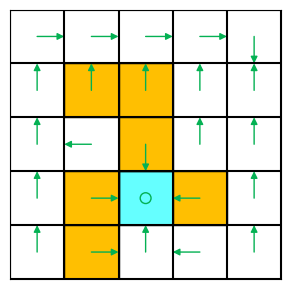

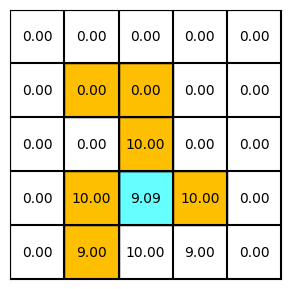

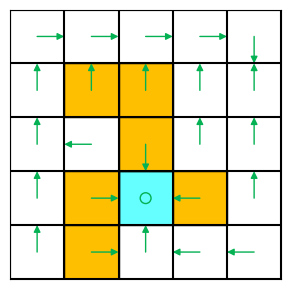

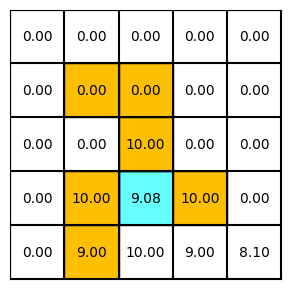

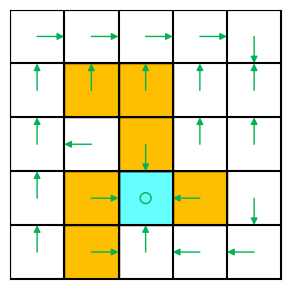

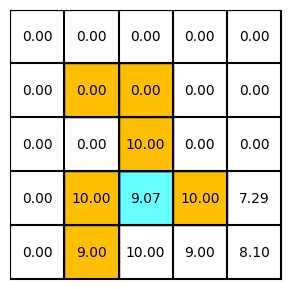

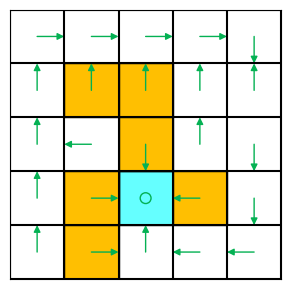

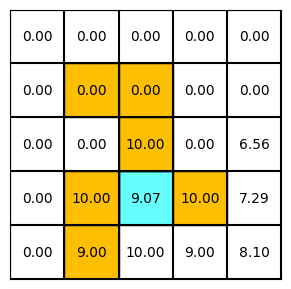

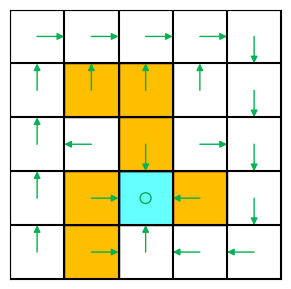

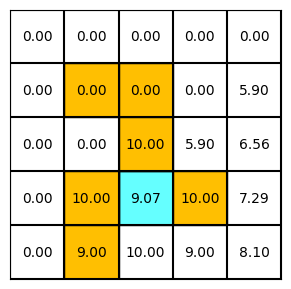

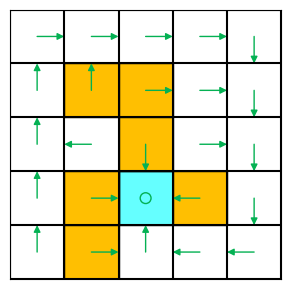

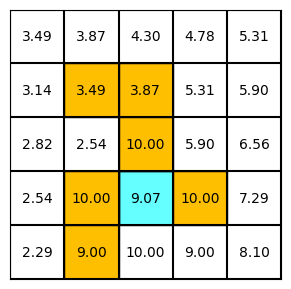

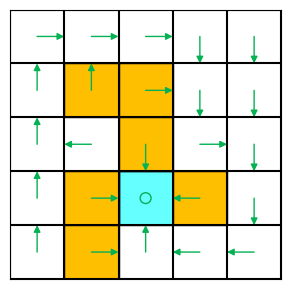

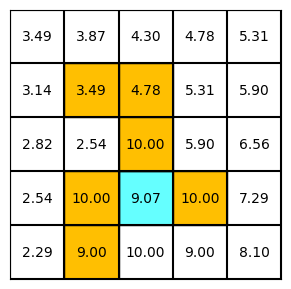

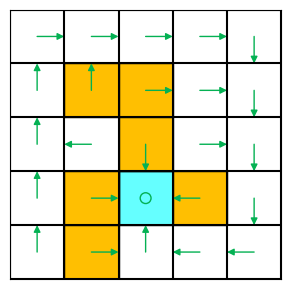

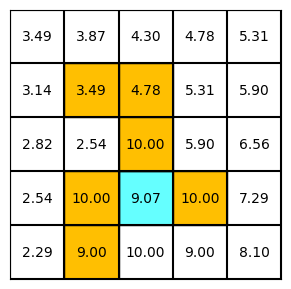

action value's mean 2.9682215486154675


In [19]:
# Every-visited  ，下一个cell是first-visited
#通过采样的方法计算action value，model free的话意味着不知道整个gridworld的概率了，所以不能直接套贝尔曼方程迭代求解

trajectorySteps = 100
qtable_pre = qtable.copy()+1
while(np.sum((qtable_pre-qtable)**2)>0.001):
    qtable_pre = qtable.copy()
    #通过采样获得action-value的值
    for now_x in range(rows):
        for now_y in range(columns):
            for j in range(5):             #循环每个action
                qtable_rewards = np.zeros((rows,columns,5))
                qtable_nums = np.zeros((rows,columns,5))
                Trajectory = gridworld.get_trajectory_score(now_state=(now_x,now_y), action=j, policy=policy, steps=trajectorySteps)
                # 注意这里的返回值是大小为(trajectorySteps+1)的元组列表，因为把第一个动作也加入进去了
                score = 0
                for k in reversed(Trajectory):
                    
                    tmpstate, tmpaction, tmpscore,_,_  = k
                    score = score*gamma + tmpscore#细节从后往前优化算法

                    qtable_rewards[tmpstate][tmpaction] += score
                    qtable_nums[tmpstate][tmpaction] += 1
                    qtable[tmpstate][tmpaction] = qtable_rewards[tmpstate][tmpaction] / qtable_nums[tmpstate][tmpaction]
    policy = np.eye(5)[np.argmax(qtable,axis=2).flatten()].reshape(rows,columns,5)  #qtable的最优值作为更新策略，并用独热码来表示
    gridworld.show_policy(policy.argmax(axis=2))
    gridworld.show_value(qtable.max(axis=2))
print("action value's mean",qtable.mean())

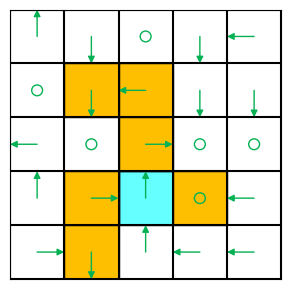

125.0


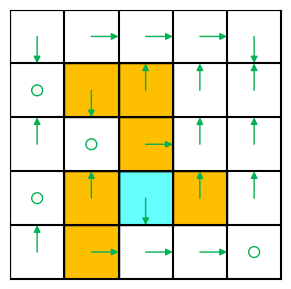

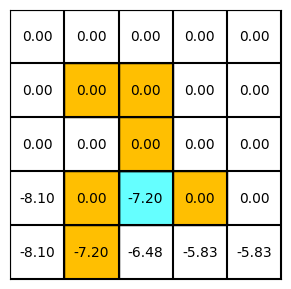

sum of qtable_pre-qtable is 100693.93820403518
100693.93820403518


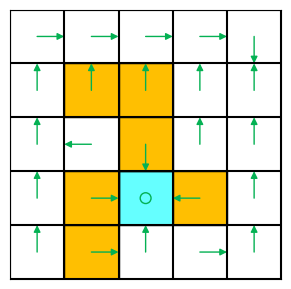

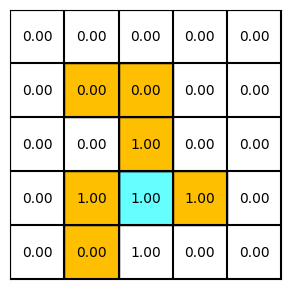

sum of qtable_pre-qtable is 86113.9337853348
86113.9337853348


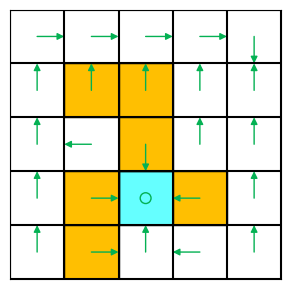

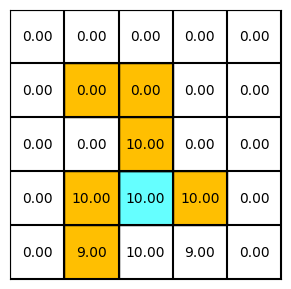

sum of qtable_pre-qtable is 2352.9196650270214
2352.9196650270214


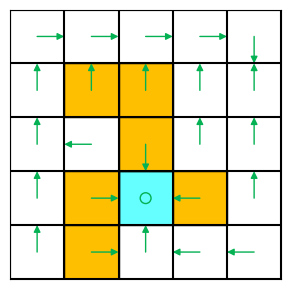

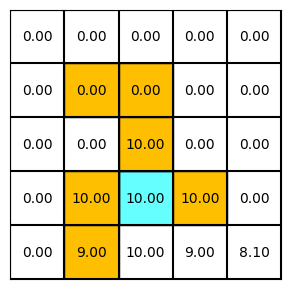

sum of qtable_pre-qtable is 328.03063702859373
328.03063702859373


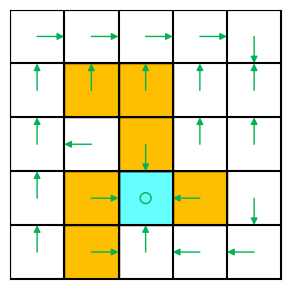

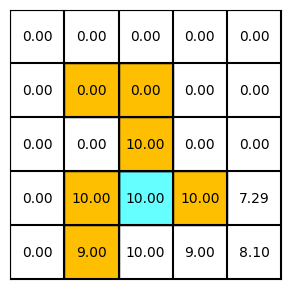

sum of qtable_pre-qtable is 265.70307335590013
265.70307335590013


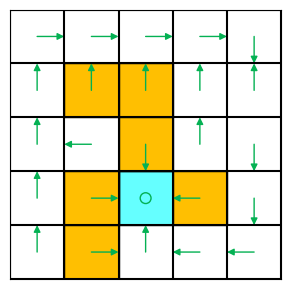

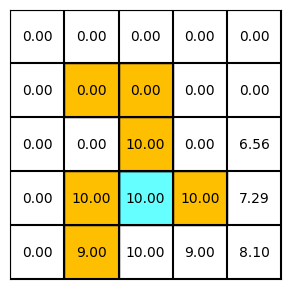

sum of qtable_pre-qtable is 215.21792104600723
215.21792104600723


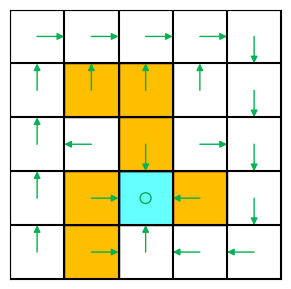

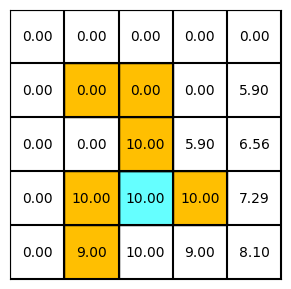

sum of qtable_pre-qtable is 174.3251045200501
174.3251045200501


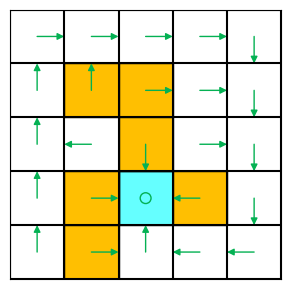

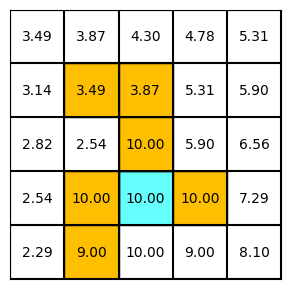

sum of qtable_pre-qtable is 1005.1913240876647
1005.1913240876647


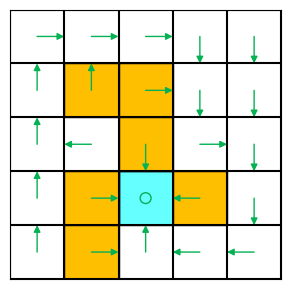

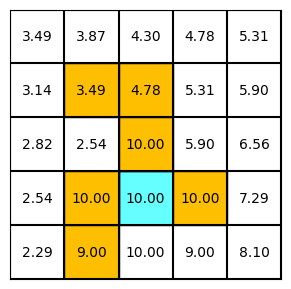

sum of qtable_pre-qtable is 7.473914205728017
7.473914205728017


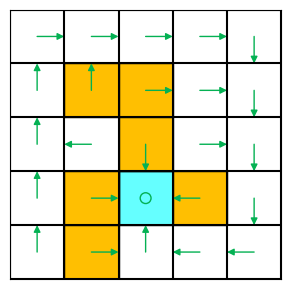

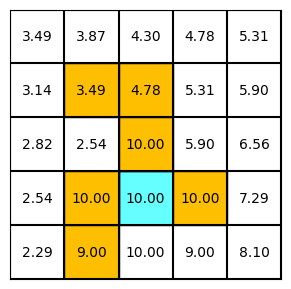

sum of qtable_pre-qtable is 8.199115827841417e-07


In [27]:
#通过采样的方法计算action value，model free的话意味着不知道整个gridworld的概率了，所以不能直接套贝尔曼方程迭代求解
policy = np.eye(5)[np.random.randint(0,5,size=(rows*columns))].reshape(rows,columns,5) 

gridworld.show_policy(policy.argmax(axis=2))
# print("random policy")

trajectorySteps = 100
qtable = np.zeros((rows*columns,5)).reshape(rows,columns,5)  #初始化，这里主要是初始化维数，里面的内容会被覆盖所以无所谓
qtable_pre = qtable.copy()+1
while(np.sum((qtable_pre-qtable)**2)>0.001):
    print(np.sum((qtable_pre-qtable)**2))
    qtable_pre = qtable.copy()
    #通过采样获得action-value的值
    for now_x in range(rows):
        for now_y in range(columns):
            for j in range(5):             #循环每个action
                Trajectory = gridworld.get_trajectory_score(now_state=(now_x,now_y), action=j, policy=policy, steps=trajectorySteps)
                score = 0
                for k in reversed(Trajectory):
                    tmpstate, tmpaction, tmpscore,_,_  = k
                    score = score*gamma + tmpscore  #细节从后往前优化算法
                    qtable[tmpstate][tmpaction] = score  #first visit
                    
    policy = np.eye(5)[np.argmax(qtable,axis=2).flatten()].reshape(rows,columns,5)  #qtable的最优值作为更新策略，并用独热码来表示
    gridworld.show_policy(policy.argmax(axis=2))
    gridworld.show_value(qtable.max(axis=2))
    print(f"sum of qtable_pre-qtable is {np.sum((qtable_pre-qtable)**2)}")



    